# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [109]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [110]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [111]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [112]:
print(clf.predict([[0, 1, 1]]))

[0]


In [113]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


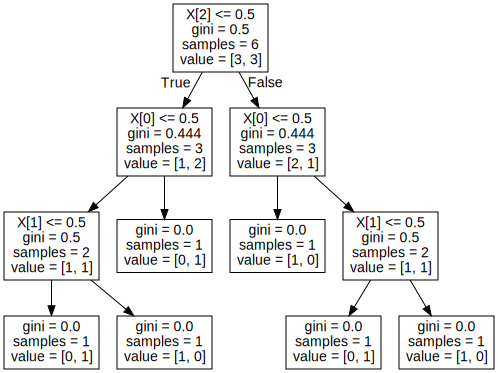

In [114]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [115]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [116]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [117]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [118]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

In [119]:
len(iris_X_train)

140

# Obtain predictions

In [120]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test)
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [121]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [122]:
for i in range(len(iris_y_test)):
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [123]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro') # Media armonica precision recall.
# F1 = 2*(precision*recall)/(precision+recall)
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score # will be used to separate training and test

scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [125]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [126]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("my_iris_predictions2")

'my_iris_predictions2.pdf'

## 2. Generate a picture here

In [127]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


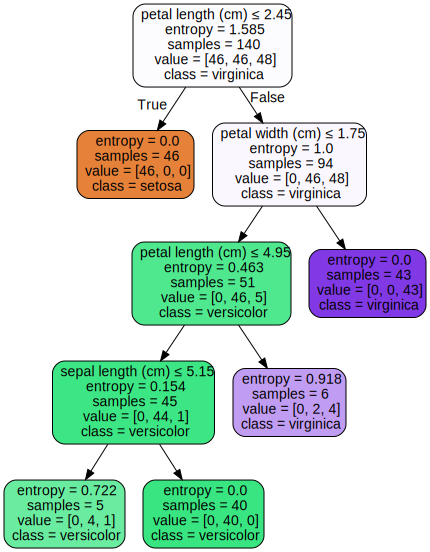

In [128]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

In [129]:
import graphviz
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt

# Vecchio risultato

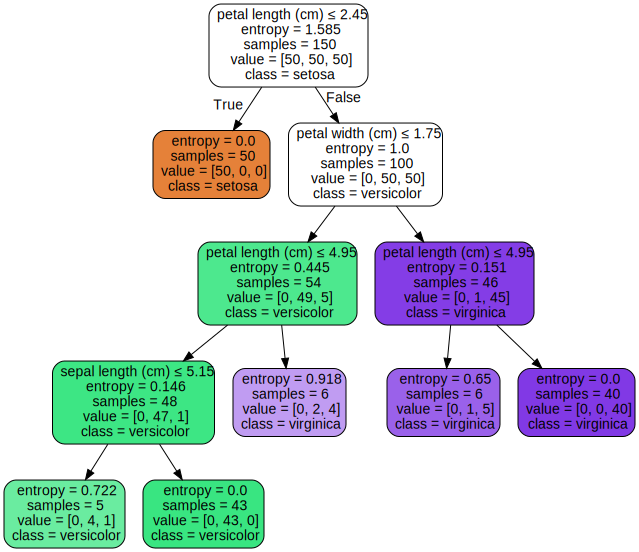

In [130]:
old_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
old_clf = old_clf.fit(iris.data, iris.target)
graph_tree = tree.export_graphviz(old_clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

# 1.a Artificial Inflation

Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.

In [131]:
iris = load_iris()
#Virginica classe 2
#Versicolor classe 1

add_X_virginica = np.repeat(iris.data[iris.target==2],9,axis=0) # ripetiamo 9 volte la matrice dei dati della virginica, ottenendone 10
add_X_versicolor = np.repeat(iris.data[iris.target==1],9,axis=0) # ripetiamo 9 volte la matrice dei dati della versicolor, ottenendone 10
# Non ripetiamo i dati della setosa dato che non vogliamo fare inflazione su di essa (gia' abbastanza facile da discriminare)
iris_X = np.concatenate((iris.data,add_X_virginica,add_X_versicolor),axis=0)

add_y_virginica = np.ones(len(add_X_virginica))+1 # +1 perchè il numero di classe è 2
add_y_versicolor = np.ones(len(add_X_versicolor)) # perchè il numero di classe è 1
iris_y = np.concatenate((iris.target,add_y_virginica,add_y_versicolor),axis=0)

np.random.seed(0) # seed per il generatore di numeri casuali
random_indices = np.random.permutation(len(iris_X)) # genera un vettore di numeri casuali
iris_X = iris_X[random_indices] # ordina i dati in modo casuale
iris_y = iris_y[random_indices] # ordina i dati in modo casuale

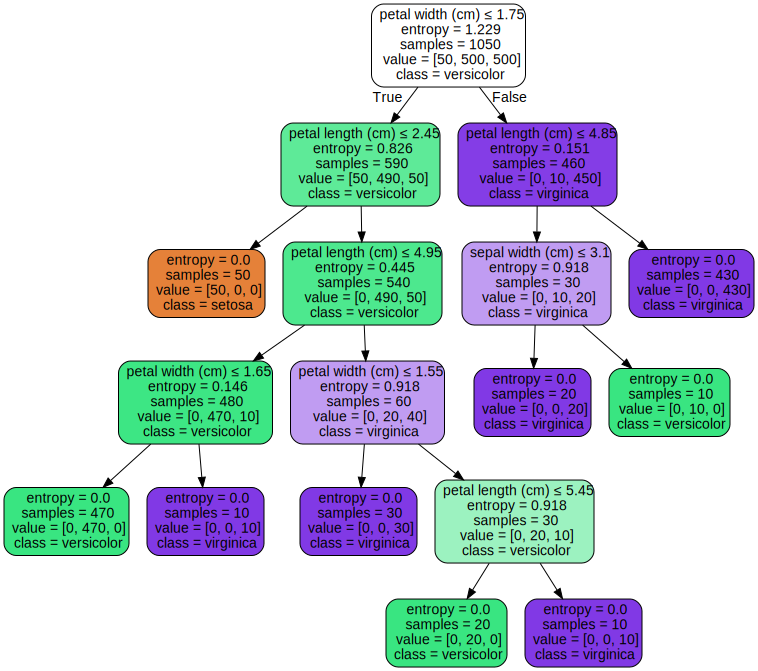

In [132]:
inf_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
inf_clf = inf_clf.fit(iris_X, iris_y)
graph_tree = tree.export_graphviz(inf_clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

# 1.b With Weight's classes

modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

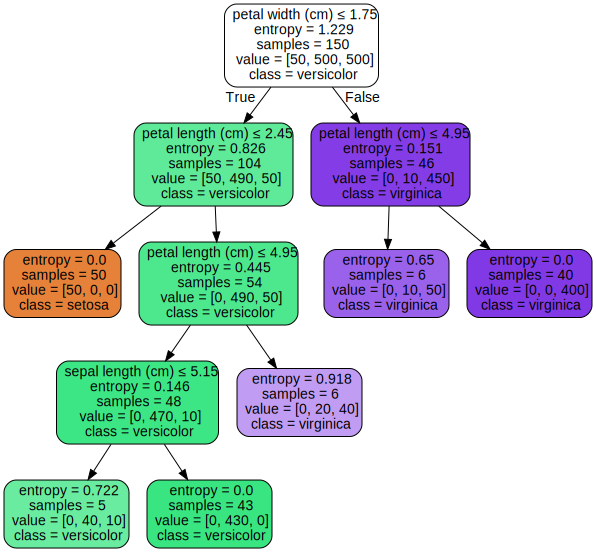

In [133]:
np.random.seed(0)
random_indices = np.random.permutation(len(iris.data))

iris_X = iris.data[random_indices]
iris_y = iris.target[random_indices]

# Create a decision tree with specific class weights
w_clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:10,2:10})
w_clf = w_clf.fit(iris_X, iris_y)
graph_tree = tree.export_graphviz(w_clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

# 2. Avoid Overfitting

Learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [134]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

indices_training=indices[:-75]
indices_test=indices[-75:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test]
iris_y_test  = iris.target[indices_test]

print(len(iris_X_train),len(iris_X_test))

75 75


In [135]:
clfs = [] # Lista dei classificatori
accs = [] # Lista delle accuratezze
cv = []   # Lista della cross-validation

# Costruiamo sei classificatori, ciascuno con una configurazione differente di hyper-parameters
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300) ) # default
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16)) # min_samples_leaf=16
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16, max_leaf_nodes=4)) # max_leaf_nodes=4
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=16, max_leaf_nodes=4, max_depth=2)) # max_depth=2
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_split=30)) # min_samples_split=30
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_impurity_decrease=0.44)) # min_impurity_decrease=0.44

# Avviamo la cross-validation su tutti i classificatori
for clf in clfs:
  cv.append(cross_val_score(clf, iris.data, iris.target, cv=10).mean()) # 10-fold cross validation (di cui faccio la media)
  clf = clf.fit(iris_X_train, iris_y_train)
  predicted_y_test = clf.predict(iris_X_test)
  accs.append(accuracy_score(iris_y_test, predicted_y_test))

print("Accuratezze per classificatore:" + str(accs))
print("Media della cross-validation per class.:" + str(cv))

Accuratezze per classificatore:[0.96, 0.96, 0.96, 0.96, 0.9733333333333334, 0.96]
Media della cross-validation per class.:[0.96, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.96, 0.9466666666666667]


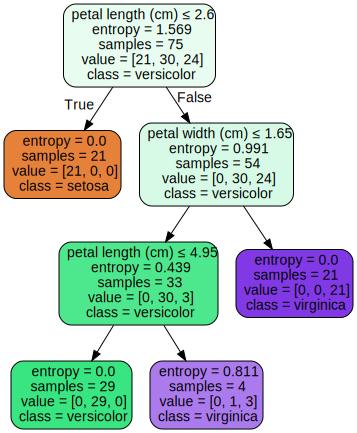

In [136]:
graph_tree = tree.export_graphviz(clfs[4], out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph_tree)
graph

# 3. Confusion Matrix

Build the confusion matrix of the created tree models on the test set and show them.

In [137]:
for i in range(len(clfs)):
  print(confusion_matrix(iris_y_test,clfs[i].predict(iris_X_test)))
  print("--------------")

[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  0 26]]
--------------
[[29  0  0]
 [ 0 18  2]
 [ 0  1 25]]
--------------


# 4. ROC curves

Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

/tmp/ipykernel_1836794/2827296832.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


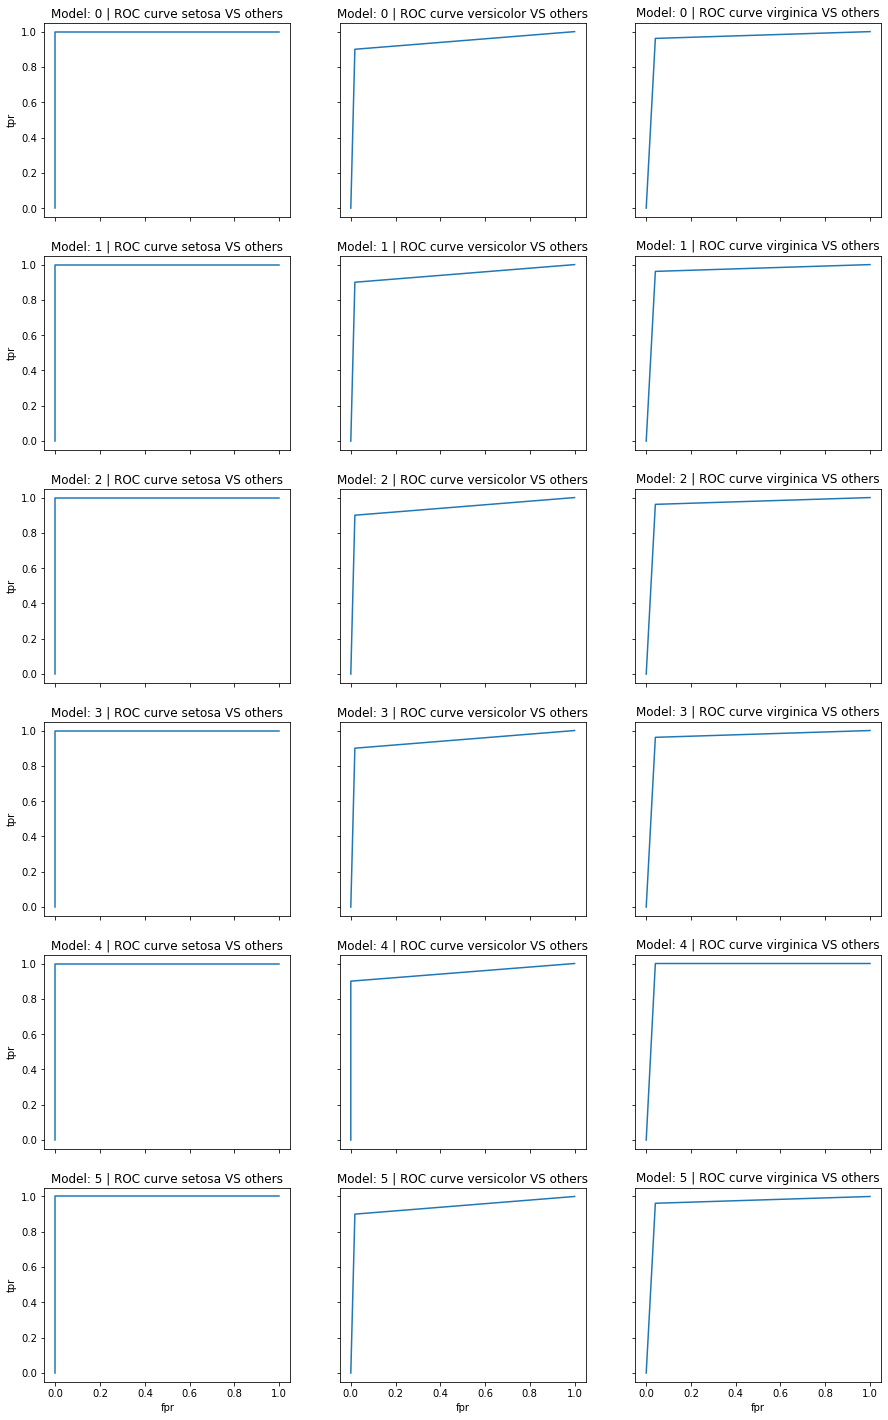

In [138]:
# 1 classe +
# -1 classe -

fig, axs = plt.subplots(len(clfs),3,figsize=(15,25))

for i in range(len(clfs)):
  for j in range(3):
    predictions = clfs[i].predict(iris_X_test)
    fpr, tpr, _ = roc_curve(np.where(iris_y_test==j, 1, -1), np.where(predictions==j, 1, -1))
    axs[i,j].plot(fpr, tpr)
    axs[i,j].set_title(f'Model: {i} | ROC curve {iris.target_names[j]} VS others')

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.show()